In [1]:
# begin by impoprting some useful libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
# define the path to the files of interest

#F508_cl_path = '../CM_F508del/closed/'
#F508_op_path = '../CM_F508del/open/'

F508_cl_path = '../CM_F508del/closed_templates_only/'
F508_op_path = '../CM_F508del/open_templates_only/'

F508_VX8_cl_path = '../CM_VX809_F508del/closed_templates_only/'
F508_VX8_op_path = '../CM_VX809_F508del/open_templates_only/'

#WT_cl_path = '../CM_WT/closed/'
#WT_op_path =  '../CM_WT/open/'

WT_cl_path = '../CM_WT/closed_templates_only/'
WT_op_path = '../CM_WT/open_templates_only/'
#WT_cl_path = '../refine_WT/closed/'
#WT_op_path =  '../refine_WT/open/'


R1070W_cl_path = '../CM_R1070W_F508del/closed_templates_only/'
R1070W_op_path = '../CM_R1070W_F508del/open_templates_only/'

R1070W_VX809_cl_path = '../CM_VX809_R1070W_F508del/closed_templates_only/'
R1070W_VX809_op_path = '../CM_VX809_R1070W_F508del/open_templates_only/'




## determine failed jobs

In [3]:
def get_failed_jobs(path, num_structs):
    scores = [] 
    failed = []
    
    for i in num_structs:
        try:
            fnm = path + 'scores/' + 'score_{}.sc'.format(i)
            x = np.genfromtxt(fnm, dtype = ['U15', 'float64'], skip_header = 1 )
            scores.append(float(x[1][1]))
        except OSError: 
            failed.append(i)
            continue
        
    print('These jobs failed:')
    print(','.join(str(i) for i in failed))

In [4]:
def lowest_scoring_n(path, num_structs, n):
    scores = [] 
    for i in num_structs:
        fnm = path + 'scores/' + 'score_{}.sc'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'], skip_header = 1 )
        scores.append(float(x[1][1]))
    scores_np = np.array(scores)
    #print(scores_np)
    lowest_scores = scores_np.argsort()[0:n]
    
    return lowest_scores

In [5]:
def get_scores(path, num_structs):
    empty_list = []
    for i in num_structs:
        fnm = path + 'scores/' + 'score_{}.sc'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'], skip_header = 1 )
        empty_list.append(float(x[1][1]))
    return empty_list

In [6]:
def get_roundn_scores(path):
    scores = []
    structs = []
    for i in range(20):
        fnm = path + 'round2_scores/' + 'score_{}.sc'.format(i)
        with open(fnm) as file:
            lines = file.readlines()
            for j in range(len(lines)):
                if j>1:
                    scores.append(float(lines[j].split()[1]))
                    structs.append(lines[j].split()[-1])
    data = pd.DataFrame(columns=['scores', 'structs'])
    data['scores'] = scores
    data['structs'] = structs
    
    return data

In [7]:
def get_rmsd(path, num_structs, domain, file_name):
    empty_list = []
    for i in num_structs:
        fnm = path + domain + '_RMSD/' + file_name + '_{}.pdb'.format(i)
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'],)
        x.shape = [1,]
        empty_list.append(float(x[0][1]))
        
    return empty_list
    

In [8]:
def pull_roundn_rmsd(df, path):
    df['rmsd'] = 0
    for i in df['structs']:
        fnm = path + i +'.pdb'
        x = np.genfromtxt(fnm, dtype = ['U15', 'float64'],)
        x.shape = [1,]
        df['rmsd'].loc[i] = float(x[0][1])
        
    return df

## Check for Failed Jobs to re-run Simmys

In [9]:
get_failed_jobs('../CM_VX809_R1070W_F508del/open_templates_only/', range(2000))

These jobs failed:



In [14]:
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,174,183,189,194,195,196,197,198,199,201,202,203,204,205,223,224,227,230,231,232,235,236,237,243,244,246,247,250,251,253,254,255,256,257,258,259,261,262,266,270,273,283,284,285,286,287,288,289,290,295,301,302,303,304,305,307,309,310,312,314,316,318,319,321,322,323,327,328,330,331,334,335,337,339,340,341,342,343,344,345,346,347,349,351,352,353,354,356,357,358,359,360,361,362,363,364,365,367,368,370,371,372,377,378,379,380,381,382,383,384,385,386,387,388,390,391,392,393,394,395,407,411,415,419,425,428,429,432,434,435,449,450,459,460,461,479,483,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,677,678,679,680,681,682,683,684,685,686,689,690,694,695,700,702,703,704,705,707,708,709,717,719,720,723,725,727,728,729,731,732,734,735,736,740,741,742,743,767,774,776,777,778,779,780,781,782,783,784,785,786,787,791,792,794,799,802,804,806,807,808,809,812,813,814,816,818,820,821,824,826,827,828,829,830,831,832,833,834,836,837,838,841,846,847,850,853,856,861,862,863,864,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,904,906,907,908,909,910,911,912,913,914,915,917,921,922,923,924,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1205,1208,1209,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1615,1616,1617,1620,1623,1648,1650,1654,1656,1660,1661,1662,1663,1664,1666,1668,1670,1674,1678,1687,1688,1691,1692,1693,1694,1695,1696,1697,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1753,1754,1755,1756,1757,1759,1760,1761,1762,1763,1775,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1797,1798,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1924,1925,1926,1927,1928,1929,1931,1932,1933,1934,1935,1936,1938,1939,1940,1941,1942,1943,1944,1946,1947,1948,1949,1950]
len(y)

1545

In [10]:
get_failed_jobs('../CM_VX809_R1070W_F508del/open_templates_only/', range(2000))

These jobs failed:



In [11]:
x = [400,401,402,403,404,406,407,409,410,411,414,415,420,421,422,423,425,426,427,428,429,430,431,432,433,434,435,436,437,440,441,442,443,444,446,447,448,449,450,451,452,453,454,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,556,563,567,568,569,591,670,671,672,673,756,759,772,773,774,775,776,777,778,779,780,781,782,793,794,795,797,874,875,876,877,1199,1303,1305,1307,1309,1310,1488,1497,1498,1506,1509,1511,1514,1515,1516,1517,1520,1522,1525,1528,1529,1532,1533,1534,1535,1536,1539,1540,1541,1542,1543,1569,1599,1610,1626,1627,1628,1630,1666,1930,1950]

In [10]:
DMS_low = np.concatenate([range(6,39), range(40,587), range(588,1000), range(1008,1040),range(1041,1190), range(1191,1201),range(1202,1365), range(1366, 1447), range(1448,2000)])





In [12]:
len(x)

183

## Get Lowest Scoring Models

In [10]:
lowest_scoring_n('../CM_VX809_R1070W_F508del/open_templates_only/', range(2000) , 100)

array([ 250, 1664, 1685, 1786, 1693,  843, 1519, 1453,  443,  163, 1807,
        654,  997, 1545, 1105,  213, 1708,  776, 1031,  757, 1953, 1422,
        745, 1829,  154, 1540, 1416,  524,  880,   84, 1938,   42, 1457,
       1984, 1346,  105, 1662, 1889,  246,  218, 1524,  646, 1481,  633,
        879, 1658,  300, 1696,  658,  570, 1623, 1111,  204, 1178,  798,
        398,  610, 1566,  716,  455,  662,  940, 1456, 1471,  449, 1450,
        235, 1955, 1005, 1548,  242, 1145, 1256, 1172, 1880, 1306, 1916,
       1791,  599, 1700,  171, 1860, 1417, 1656,  900,  200, 1285, 1364,
        643, 1066, 1040, 1085, 1238,    4, 1100, 1937,  323, 1940,  283,
        697])

In [11]:
# get the lowest scoring 100 models
x = lowest_scoring_n('../CM_VX809_R1070W_F508del/open_templates_only/', range(2000), 100)
y = list(x)

# print them out in a list 
print(','.join([str(i) for i in y]))


250,1664,1685,1786,1693,843,1519,1453,443,163,1807,654,997,1545,1105,213,1708,776,1031,757,1953,1422,745,1829,154,1540,1416,524,880,84,1938,42,1457,1984,1346,105,1662,1889,246,218,1524,646,1481,633,879,1658,300,1696,658,570,1623,1111,204,1178,798,398,610,1566,716,455,662,940,1456,1471,449,1450,235,1955,1005,1548,242,1145,1256,1172,1880,1306,1916,1791,599,1700,171,1860,1417,1656,900,200,1285,1364,643,1066,1040,1085,1238,4,1100,1937,323,1940,283,697


## Make Custom PDB lists

In [12]:
path = '../CM_VX809_R1070W_F508del/open_templates_only/'

x = lowest_scoring_n(path, range(2000), 100)
y = list(x)
with open(path + 'pdb.list', 'a') as the_file:
    for i in y:
        line = 'S_' + str(i) + '_0001.pdb\n' 
        the_file.write(line)
        
the_file.close()

## Score vs. RMSD Plots

In [13]:
x = lowest_scoring_n('../CM_WT/closed_templates_only/', range(2000), 100)
WT_cl_struct_list = list(x)

In [14]:
x = lowest_scoring_n('../CM_WT/open_templates_only/', range(2000), 100)
WT_op_struct_list = list(x)

In [15]:
x = lowest_scoring_n('../CM_F508del/closed_templates_only/', range(2000), 100)
F508del_cl_struct_list = list(x)

In [16]:
x = lowest_scoring_n('../CM_F508del/open_templates_only/', np.concatenate([range(482), range(483,1221), range(1222,1244), range(1245,2000)]), 100)
F508del_op_struct_list = list(x)

In [17]:
x = lowest_scoring_n('../CM_VX809_F508del/closed_templates_only/', range(2000), 100)
F508del_VX_cl_struct_list = list(x)

In [18]:
x = lowest_scoring_n('../CM_VX809_F508del/open_templates_only/', range(2000), 100)
F508del_VX_op_struct_list = list(x)

In [19]:
x = lowest_scoring_n('../CM_R1070W_F508del/closed_templates_only/', range(2000), 100)
R1070W_cl_struct_list = list(x)

In [20]:
x = lowest_scoring_n('../CM_VX809_R1070W_F508del/closed_templates_only/', range(2000), 100)
R1070W_VX809_cl_struct_list = list(x)

In [21]:
x = lowest_scoring_n('../CM_R1070W_F508del/open_templates_only/', range(2000), 100)
R1070W_op_struct_list = list(x)

In [22]:
x = lowest_scoring_n('../CM_VX809_R1070W_F508del/open_templates_only/', range(2000), 100)
R1070W_VX809_op_struct_list = list(x)

In [23]:
WT_cl_rmsd = get_rmsd(WT_cl_path, WT_cl_struct_list, "struct", '5uak_WT_struct_rmsd')

In [24]:
WT_op_rmsd = get_rmsd(WT_op_path, WT_op_struct_list, "struct", '6msm_WT_struct_rmsd')

In [25]:
F508del_cl_rmsd = get_rmsd(F508_cl_path, F508del_cl_struct_list, "struct", '5uak_F508del_struct_rmsd')

In [26]:
F508del_op_rmsd = get_rmsd(F508_op_path, F508del_op_struct_list, "struct", '6msm_F508del_struct_rmsd')

In [27]:
F508del_VX8_cl_rmsd = get_rmsd(F508_VX8_cl_path, F508del_VX_cl_struct_list, "struct", '5uak_F508del_VX809_res_rmsd')

In [28]:
F508del_VX8_op_rmsd = get_rmsd(F508_VX8_op_path, F508del_VX_op_struct_list, "struct", '6msm_F508del_VX809_struct_rmsd')

In [29]:
R1070W_cl_rmsd = get_rmsd(R1070W_cl_path, R1070W_cl_struct_list, "struct", '5uak_R1070W_F508del_struct_rmsd')

In [30]:
R1070W_VX809_cl_rmsd = get_rmsd(R1070W_VX809_cl_path, R1070W_VX809_cl_struct_list, "struct", '5uak_VX809_R1070W_F508del_struct_rmsd')

In [31]:
R1070W_op_rmsd = get_rmsd(R1070W_op_path, R1070W_op_struct_list , "struct", '6msm_R1070W_F508del_struct_rmsd')

In [32]:
R1070W_VX809_op_rmsd = get_rmsd(R1070W_VX809_op_path, R1070W_VX809_op_struct_list , "struct", '6msm_R1070W_F508del_VX809_struct_rmsd')

In [33]:
WT_cl_scores = get_scores(WT_cl_path, range(2000))

In [34]:
WT_op_scores = get_scores(WT_op_path, range(2000))

In [35]:
F508del_cl_scores = get_scores(F508_cl_path, range(2000))

In [36]:
F508del_op_scores = get_scores(F508_op_path, range(2000))

In [37]:
F508del_VX8_cl_scores = get_scores(F508_VX8_cl_path, range(2000))

In [38]:
F508del_VX8_op_scores = get_scores(F508_VX8_op_path, range(2000))

In [39]:
R1070W_cl_scores = get_scores(R1070W_cl_path, range(2000))

In [40]:
R1070W_VX809_cl_scores = get_scores(R1070W_VX809_cl_path, range(2000))

In [41]:
R1070W_op_scores = get_scores(R1070W_op_path, range(2000))

In [42]:
R1070W_VX809_op_scores = get_scores(R1070W_VX809_op_path, range(2000))

### from lowest scoring models

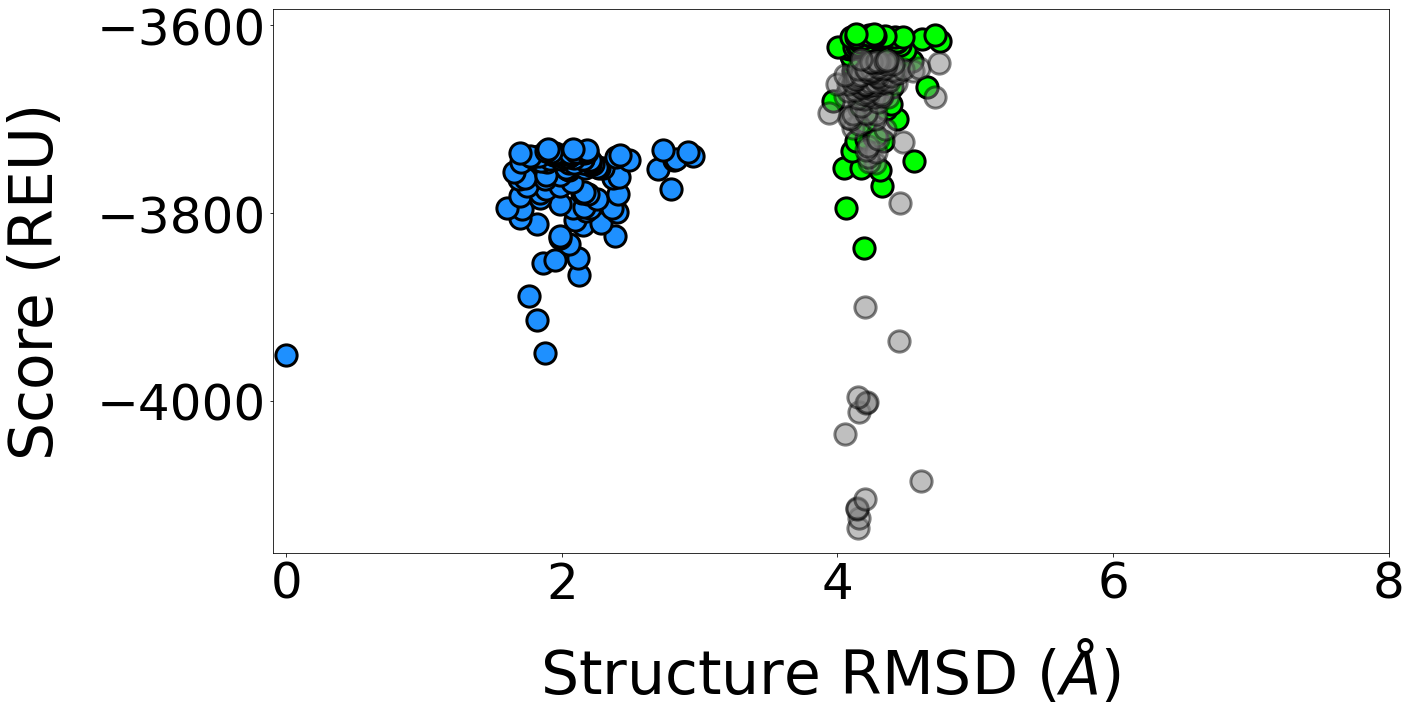

In [44]:
x = WT_op_rmsd 
y = WT_op_scores

x1 = R1070W_op_rmsd
y1 = R1070W_op_scores

x2 = R1070W_VX809_op_rmsd
y2 = R1070W_VX809_op_scores

'''
x3 = F508del_VX8_cl_rmsd
y3 = F508del_VX8_cl_scores
'''
font = 60

fig, ax = plt.subplots()
plt.tick_params(axis='both', which='major', labelsize=font-10)


fig.set_figheight(10)
fig.set_figwidth(20)

lown = 1
## look at lowest n scores 
n = int(len(x)/lown)
lowest = {}
y_np =np.array(y)
for i, val in enumerate(y_np.argsort()[0:n]):
    lowest[str(i)] = val
    
n1 = int(len(x1)/lown)
lowest1 = {}
y_np1 =np.array(y1)
for i, val in enumerate(y_np1.argsort()[0:n1]):
    lowest1[str(i)] = val

n2 = int(len(x2)/lown)
lowest2 = {}
y_np2 =np.array(y2)
for i, val in enumerate(y_np2.argsort()[0:n2]):
    lowest2[str(i)] = val
'''
n3 = int(len(x3)/lown)
lowest3 = {}
y_np3 =np.array(y3)
for i, val in enumerate(y_np3.argsort()[0:n3]):
    lowest3[str(i)] = val
'''

for key in lowest:
    ax.scatter(x[int(key)], y[lowest[key]], c ='dodgerblue', edgecolors='k', s=450, linewidths=3)
    
for key in lowest1:
    ax.scatter(x1[int(key)], y1[lowest1[key]], c ='lime', edgecolors='k', s=450, linewidths=3)

    
for key in lowest2:
    ax.scatter(x2[int(key)], y2[lowest2[key]], c ='grey', edgecolors='k', alpha=.5, s=450, linewidths=3)

#for key in lowest3:
 #   ax.scatter(x3[int(key)], y3[lowest3[key]], c ='magenta', edgecolors='k', s=450, linewidths=3)
    
    
#ax.scatter(x1,y1, s=250, c = 'red', marker = 'o', edgecolors='k', zorder= 0)
#ax.scatter(0,min(y1), s=100, c='lime', marker= 'o', edgecolors='k')


#ax.plot(x, [i*slope +intercept for i in x], '--', c= 'r' )
#ax.plot([min(x), max(x)], [min(y), max(y)],
         #'--', color = 'k') 

ax.set_xlabel('Structure RMSD ($\AA$)', fontsize =font)
ax.set_ylabel('Score (REU)',fontsize =font)
ax.set_xlim(-0.1,8)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
#ax.text(max(x)-1 , min(y)+50 , 'r = {:.3f}'.format(r_value), color='k', 
 
    #bbox=dict(facecolor='none', edgecolor='k', boxstyle='square,pad=1'))
    
fig.savefig('../figures/6msm_template_sampling_score_vs_rmsd_R1070W_VX809.svg', format='svg')

In [61]:
stat1 = stats.mannwhitneyu(R1070W_cl_scores, R1070W_VX809_cl_scores) 
stat2 = stats.mannwhitneyu(R1070W_VX809_op_scores, R1070W_VX809_op_scores) 


print('R1070W vs. w/ VX-809 in the CLOSED state ' + str(stat1[1]))
print('R1070W vs. w/ VX-809 in the OPEN state ' + str(stat2[1]))

R1070W vs. w/ VX-809 in the CLOSED state 0.15912548808142735
R1070W vs. w/ VX-809 in the OPEN state 0.4999945379400376


In [50]:
stat1 = stats.mannwhitneyu(F508del_cl_scores, F508del_VX8_cl_scores) 

#stat2 = stats.mannwhitneyu(F508del_op_scores, F508del_VX8_op_scores) 


print('WT vs. F508del in the CLOSED state ' + str(stat1[1]))
#print('WT vs. F508del in the OPEN state ' + str(stat2[1]))

WT vs. F508del in the CLOSED state 0.0


In [40]:
print(np.mean(F508del_VX8_cl_scores))
print(np.mean(F508del_cl_scores))

-3564.9929325000003
-3581.5936555


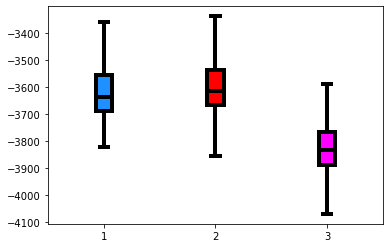

In [49]:
c = 'k'


plt.boxplot([WT_cl_scores], showfliers = False,
            positions=[1],notch=False, patch_artist=True,
            boxprops=dict(facecolor='dodgerblue', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )

plt.boxplot([F508del_cl_scores], showfliers = False,
            positions=[2],notch=False, patch_artist=True,
            boxprops=dict(facecolor='r', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )

plt.boxplot([F508del_VX8_cl_scores], showfliers = False,
            positions=[3],notch=False, patch_artist=True,
            boxprops=dict(facecolor='magenta', color=c, lw=4),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            medianprops=dict(color=c, lw=4),
            )




plt.grid(False, axis='x')

plt.show()

WT vs. F508del in the CLOSED state 8.363595636848332e-11
WT vs. F508del in the OPEN state 1.1353328797149757e-37


In [53]:
WT_cl_rmsd = get_rmsd(WT_cl_path, range(2000), "struct", '5uak_WT_struct_rmsd')

In [54]:
WT_op_rmsd = get_rmsd(WT_op_path, range(2000), "struct", '6msm_WT_struct_rmsd')

In [55]:
F508del_cl_rmsd = get_rmsd(F508_cl_path, range(2000), "struct", '5uak_F508del_struct_rmsd')

In [56]:
F508del_op_rmsd = get_rmsd(F508_op_path, range(2000), "struct", '6msm_F508del_struct_rmsd')

In [57]:
F508del_VX8_cl_rmsd = get_rmsd(F508_VX8_cl_path, F508del_VX_cl_struct_list, "struct", '5uak_F508del_VX809_res_rmsd')

In [58]:
F508del_VX8_op_rmsd = get_rmsd(F508_VX8_op_path, F508del_VX_op_struct_list, "struct", '6msm_F508del_VX809_struct_rmsd')

In [59]:
R1070W_cl_rmsd = get_rmsd(R1070W_cl_path, range(2000), "struct", '5uak_R1070W_F508del_struct_rmsd')

In [60]:
R1070W_op_rmsd = get_rmsd(R1070W_op_path, range(2000) , "struct", '6msm_R1070W_F508del_struct_rmsd')

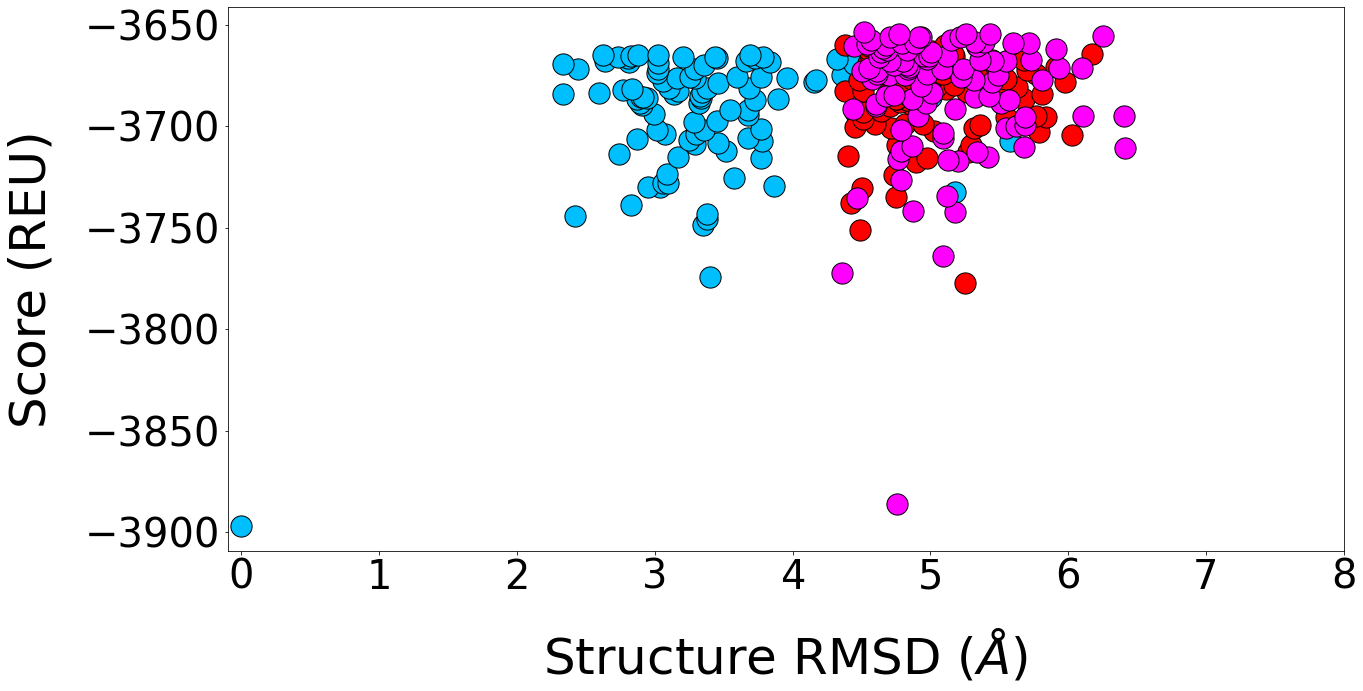

In [63]:
x = WT_cl_rmsd 
y = WT_cl_scores

x1 = F508del_cl_rmsd
y1 = F508del_cl_scores

x2 = R1070W_cl_rmsd
y2 = R1070W_cl_scores

x3 = F508del_VX8_cl_rmsd
y3 = F508del_VX8_cl_scores

font = 50
#print(min(x))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

fig, ax = plt.subplots()
plt.tick_params(axis='both', which='major', labelsize=font-10)


fig.set_figheight(10)
fig.set_figwidth(20)

lown = 20
## look at lowest n scores 
n = int(len(x)/lown)
lowest = {}
y_np =np.array(y)
for i, val in enumerate(y_np.argsort()[0:n]):
    lowest[str(i)] = val
    
n1 = int(len(x1)/lown)
lowest1 = {}
y_np1 =np.array(y1)
for i, val in enumerate(y_np1.argsort()[0:n1]):
    lowest1[str(i)] = val

n2 = int(len(x2)/lown)
lowest2 = {}
y_np2 =np.array(y2)
for i, val in enumerate(y_np2.argsort()[0:n2]):
    lowest2[str(i)] = val

lown = 1
n3 = int(len(x3)/lown)
lowest3 = {}
y_np3 =np.array(y3)
for i, val in enumerate(y_np3.argsort()[0:n3]):
    lowest3[str(i)] = val
    

    
#ax.scatter(x,y, s=250, c = 'deepskyblue', marker = 'o', edgecolors='k', zorder = 1)

#ax.scatter(x1,y1, s=250, c = 'red', marker = 'o', edgecolors='k')
#ax.scatter(x2,y2, s=250, c = 'lime', marker = 'o', edgecolors='k')

for key in lowest:
    ax.scatter(x[lowest[key]], y[lowest[key]], c ='deepskyblue', edgecolors='k', s=450)
    
for key in lowest1:
    ax.scatter(x1[lowest1[key]], y1[lowest1[key]], c ='red', edgecolors='k', s=450)

    
#for key in lowest2:
 #   ax.scatter(x2[lowest2[key]], y2[lowest2[key]], c ='lime', edgecolors='k', s=450)

for key in lowest3:
    ax.scatter(x3[int(key)], y3[lowest3[key]], c ='magenta', edgecolors='k', s=450)
    
    
    
#ax.scatter(x1,y1, s=250, c = 'red', marker = 'o', edgecolors='k', zorder= 0)
#ax.scatter(0,min(y1), s=100, c='lime', marker= 'o', edgecolors='k')


#ax.plot(x, [i*slope +intercept for i in x], '--', c= 'r' )
#ax.plot([min(x), max(x)], [min(y), max(y)],
         #'--', color = 'k') 

ax.set_xlabel('Structure RMSD ($\AA$)', fontsize =font)
ax.set_ylabel('Score (REU)',fontsize =font)
ax.set_xlim(-0.1,8)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 30
#ax.text(max(x)-1 , min(y)+50 , 'r = {:.3f}'.format(r_value), color='k', 
 
    #bbox=dict(facecolor='none', edgecolor='k', boxstyle='square,pad=1'))
    
fig.savefig('../figures/5uak_qloop_sampling_score_vs_rmsd_VX809.svg', format='svg')

## Make Custom PDB lists

In [65]:
path = '../CM_R1070W_F508del/closed/'

x = lowest_scoring_n(path, range(2000), 100)
y = list(x)
with open(path + 'pdb.list', 'a') as the_file:
    for i in y:
        line = 'S_' + str(i) + '_0001.pdb\n' 
        the_file.write(line)
        
the_file.close()

In [158]:
data_cl = pd.read_csv('../CM_VX809_F508del/closed/interface_score.txt', sep="\s+", header=0)

In [192]:
data_op = pd.read_csv('../CM_VX809_F508del/open/interface_score.txt', sep="\s+", header=0)

In [193]:
data_op

,SCORE:,total_score,Menv_smooth,angle_constraint,atom_pair_constraint,cart_bonded,chainbreak,complex_normalized,coordinate_constraint,dG_cross,...,per_residue_energy_int,pro_close,rama,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,description
0,SCORE:,-5498.788,-190.883,0.0,0.0,1362.941,0.0,-3.410,0.0,0.0,...,-4.108,43.399,-127.065,-221.53,0.0,-4.167,-62.503,-3.231,-3.231,S_1245_0001_0001
1,SCORE:,-5452.516,-179.716,0.0,0.0,1353.834,0.0,-3.371,0.0,0.0,...,-3.865,44.168,-121.611,-221.53,0.0,-3.708,-59.324,-6.376,-6.376,S_1584_0001_0001
2,SCORE:,-5470.385,-173.810,0.0,0.0,1408.850,0.0,-3.348,0.0,0.0,...,-4.549,44.438,-130.796,-221.53,0.0,-4.436,-70.982,-6.356,-6.356,S_292_0001_0001
3,SCORE:,-5520.793,-179.744,0.0,0.0,1446.448,0.0,-3.339,0.0,0.0,...,-4.132,40.434,-123.833,-221.53,0.0,-3.944,-55.219,-6.762,-6.762,S_1197_0001_0001
4,SCORE:,-5459.731,-188.819,0.0,0.0,1433.188,0.0,-3.307,0.0,0.0,...,-4.716,43.181,-125.250,-221.53,0.0,-4.443,-53.314,-8.000,-8.000,S_1795_0001_0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SCORE:,-5345.230,-177.358,0.0,0.0,1577.413,0.0,-3.071,0.0,0.0,...,-4.563,56.994,-110.538,-221.53,0.0,-4.292,-55.802,-8.084,-8.084,S_1617_0001_0001
96,SCORE:,-5317.624,-173.363,0.0,0.0,1545.221,0.0,-3.077,0.0,0.0,...,-3.578,59.836,-114.296,-221.53,0.0,-3.452,-48.323,-5.350,-5.350,S_160_0001_0001
97,SCORE:,-5231.291,-186.432,0.0,0.0,1468.137,0.0,-3.079,0.0,0.0,...,-4.776,69.332,-110.855,-221.53,0.0,-4.510,-54.125,-7.967,-7.967,S_666_0001_0001
98,SCORE:,-5274.539,-193.574,0.0,0.0,1513.793,0.0,-3.068,0.0,0.0,...,-3.821,58.194,-100.901,-221.53,0.0,-3.697,-51.763,-5.559,-5.559,S_581_0001_0001


In [195]:
structs = [int(i.split('_')[1]) for i in data_op['description']]

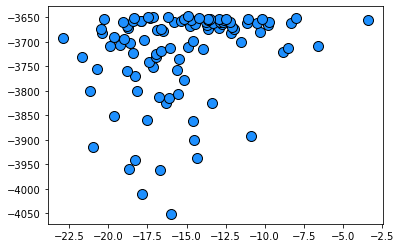

In [199]:

x = np.array(data_op['interface_delta_G'])
y = F508del_VX8_op_scores
#y = np.array(data_op['total_score'])

#plt.scatter(x,y)
for i in range(len(x)):
    plt.scatter(x[i], y[structs[i]], c='dodgerblue', edgecolor='k', s=100)


    